## Machine Learning And Data Science - PROJECT WORK

## TEAM 1

### Team Members:
* Arshad alibaig
* Ram Karthik 
* Vishal

## Problem Statement : Prediciting Car Prices using K-Nearest Neighbours (KNN) Algorithm

* <b><h2>Importing Libraries</b></h2>

In [90]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale
##from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

* <b><h2>Reading DataFile</b></h2>

In [91]:
df=pd.read_csv('DataFiles/car.csv')

* <b><h2>Displaying first 5 Rows</b></h2>

In [92]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<h1><u><b>Data Cleaning</b></u></h1>

* <b><h2>Replacing '?' values with 'Nan' in 'normalized_losses'</b></h2>

In [93]:
clean_data=df.replace('?',np.nan)
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


* <b><h2>Filling Nan values with 0</b></h2>

In [94]:
clean_data=clean_data.fillna(0)
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [96]:
data=clean_data
data.make=le.fit_transform(data.make)
data.fuel_type=le.fit_transform(data.fuel_type)
data.aspiration=le.fit_transform(data.aspiration)
data.num_doors=data.num_doors.astype(str)
data.num_doors=le.fit_transform(data.num_doors)
# a=data.num_doors.astype(str)

# print(a.dtypes)
# data.num_doors.dtypes

data.body_style=le.fit_transform(data.body_style)
data.drive_wheels=le.fit_transform(data.drive_wheels)
data.engine_location=le.fit_transform(data.engine_location)
data.engine_type=le.fit_transform(data.engine_type)
data.num_cylinders=le.fit_transform(data.num_cylinders)
data.fuel_system=le.fit_transform(data.fuel_system)
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,13495
1,3,0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,16500
2,1,0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.4,8.00,115,5500,18,22,17450
5,2,0,1,1,0,2,3,1,0,99.8,...,136,5,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,1,1,0,1,3,1,0,105.8,...,136,5,3.19,3.4,8.50,110,5500,19,25,17710
7,1,0,1,1,0,1,4,1,0,105.8,...,136,5,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,1,1,1,1,3,1,0,105.8,...,131,5,3.13,3.4,8.30,140,5500,17,20,23875
9,0,0,1,1,1,2,2,0,0,99.5,...,131,5,3.13,3.4,7.00,160,5500,16,22,0


In [97]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

* <b><h2>Converting 'normalized_losses' to integer type</b></h2>

In [98]:
clean_data["normalized_losses"]=pd.to_numeric(clean_data["normalized_losses"])

In [99]:
type(clean_data.loc[0][1])

numpy.int64

 * <b><h2>Verifying if the column's mean is diplayed or not</b></h2>

In [100]:
clean_data.mean()

symboling               0.834146
normalized_losses      97.600000
make                   12.195122
fuel_type               0.902439
aspiration              0.180488
num_doors               1.424390
body_style              2.614634
drive_wheels            1.326829
engine_location         0.014634
wheel_base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb_weight          2555.565854
engine_type             3.014634
num_cylinders           2.117073
engine_size           126.907317
fuel_system             3.253659
compression_ratio      10.142537
city_mpg               25.219512
highway_mpg            30.751220
dtype: float64

* <b><h2>Replacing missing values with mean of that Column</b></h2>

In [101]:
clean_data=clean_data.replace(0,clean_data.mean())
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,97.6,12.195122,1.0,0.180488,2.0,2.614634,2.000000,0.014634,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495
1,3.0,97.6,12.195122,1.0,0.180488,2.0,2.614634,2.000000,0.014634,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500
2,1.0,97.6,12.195122,1.0,0.180488,2.0,2.000000,2.000000,0.014634,94.5,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500
3,2.0,164.0,1.000000,1.0,0.180488,1.0,3.000000,1.000000,0.014634,99.8,...,109,5.0,3.19,3.4,10.0,102,5500,24,30,13950
4,2.0,164.0,1.000000,1.0,0.180488,1.0,3.000000,1.326829,0.014634,99.4,...,136,5.0,3.19,3.4,8.0,115,5500,18,22,17450


* <b><h2>Visualizing Data using Bar Plot</b></h2>

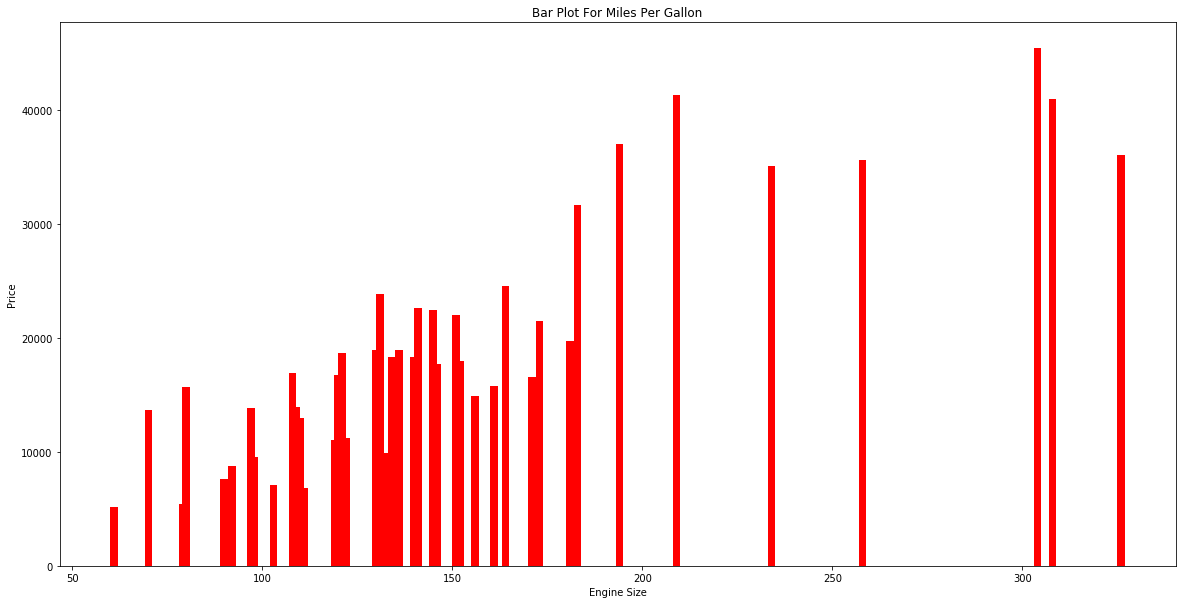

In [102]:
plt.figure(figsize=(20,10))
plt.bar(clean_data.engine_size.astype(int),clean_data.price.astype(int),width=2,color='red')
#plt.figure(figsize=(20,10))
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Bar Plot For Miles Per Gallon")
plt.show()

* <b><h2>Visualizing Data using Histogram</b></h2>

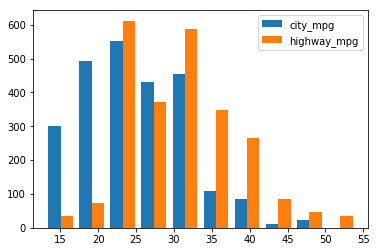

In [103]:
plt.hist([clean_data.city_mpg,clean_data.highway_mpg],label=["city_mpg","highway_mpg"])
plt.legend()
plt.show()


* <b><h2>Assigning Dependent and Target Variables</b></h2>

In [104]:
x=clean_data.loc[:]
y=clean_data.loc[:,'price']
type(x)

pandas.core.frame.DataFrame

In [105]:
x=scale(x)
x

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[ 1.6991484 , -0.59014897, -0.02935014, ..., -0.64655303,
        -0.54605874,  0.06769444],
       [ 1.6991484 , -0.59014897, -0.02935014, ..., -0.64655303,
        -0.54605874,  0.44055495],
       [-0.09582443, -0.59014897, -0.02935014, ..., -0.95301169,
        -0.69162706,  0.44055495],
       ...,
       [-1.89079725, -0.66875488,  1.41868771, ..., -1.10624102,
        -1.12833203,  1.05909393],
       [-1.89079725, -0.66875488,  1.41868771, ...,  0.11959362,
        -0.54605874,  1.18131276],
       [-1.89079725, -0.66875488,  1.41868771, ..., -0.95301169,
        -0.83719538,  1.20054517]])

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state = 1)

In [127]:
x=pd.DataFrame(x)
x.head()
#x_train[0].dtypes

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.699148,-0.590149,-0.029350,0.328798,-0.469295,1.137602,-0.105268,1.290259,-0.121867,-1.690772,...,0.074449,0.848088,0.384335,-0.933646,-0.288349,0.190534,-0.108760,-0.646553,-0.546059,0.067694
1,1.699148,-0.590149,-0.029350,0.328798,-0.469295,1.137602,-0.105268,1.290259,-0.121867,-1.690772,...,0.074449,0.848088,0.384335,-0.933646,-0.288349,0.190534,-0.108760,-0.646553,-0.546059,0.440555
2,-0.095824,-0.590149,-0.029350,0.328798,-0.469295,1.137602,-0.950749,1.290259,-0.121867,-0.708596,...,0.604046,0.848088,-1.095176,0.507215,-0.288349,1.246195,-0.108760,-0.953012,-0.691627,0.440555
3,0.801662,1.417325,-1.870484,0.328798,-0.469295,-0.887634,0.424835,-0.807997,-0.121867,0.173698,...,-0.431076,0.848088,-0.140049,0.379544,-0.035973,-0.030418,0.612788,-0.186865,-0.109354,0.124151
4,0.801662,1.417325,-1.870484,0.328798,-0.469295,-0.887634,0.424835,-0.122226,-0.121867,0.107110,...,0.218885,0.848088,-0.140049,0.379544,-0.540725,0.288735,0.612788,-1.106241,-1.273900,0.558431


In [128]:
y_test.head()
#y_test.shape

1268     9095
2270    30760
1617     7775
499      5499
535     22018
Name: price, dtype: object

* <b><h2>To check if the value is NULL</b></h2>

In [129]:
clean_data.normalized_losses.isnull().sum()

0

In [130]:
clean_data.engine_size.isnull().sum()

0

In [131]:
clean_data.horsepower.isnull().sum()

0

In [132]:
clean_data.city_mpg.isnull().sum()

0

In [133]:
clean_data.price.isnull().sum()

0

In [134]:
#y.astype(int)

In [135]:
#x.astype(int)
type(y_train)
y_train.dtypes
y_train.dtypes

dtype('O')

* <b><h2>Fitting the testing data and training data</b></h2>

In [136]:
model_knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
model_knn.fit(x_train.astype(int),y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [137]:
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

* <b><h2>Predicting the prices based on test values</b></h2>

In [138]:
y_predict=model_knn.predict(x_test)
len(y_predict)
y_predict

array([ 6529, 30760,  7775,     0, 22018,     0,  7995, 10295,  7775,
       31600,  7898,     0,  5348, 41315, 22470, 13860,  7995,  6488,
       10945, 18150, 16515,     0,  5389, 18150, 12290, 11259, 16845,
        8948, 12290, 11199, 16500,  7126,     0,  5389,  9989, 16630,
       22470, 17450, 17710, 18280,  6229,  6488,  5389,  9989,     0,
        8499,  8249,  7738, 13860,  7898, 16900,  7349, 10945, 10795,
        5348,  6989, 16503, 34184,  7349,  7099, 18344, 16500, 15250,
        8195, 36880,  8948, 15580, 10795, 37028, 36880,  9959, 12440,
       15998, 15040, 16900,  8948,  6488,  6575, 30760,  5348, 35056,
        5348,  5348, 11048, 45400, 15510,  7689, 11694, 12940, 18620,
       34028,  6229,  6229,  7295,  7053,  7957, 18920,     0,  6989,
       13845, 18420,  8238, 17199,  9989, 18420, 15998,  7053, 18280,
        6488, 13860, 31600,  8948, 11259,  6488,  7775,  7775, 15690,
        9279, 13950, 12940,  9279,  5399,     0,  7775,  5572, 13845,
           0,     0,

In [139]:
np.mean(y_predict)

13292.044715447155

In [140]:
np.mean(y_test.astype(float))

13813.117886178861

In [141]:
y_test.head()

1268     9095
2270    30760
1617     7775
499      5499
535     22018
Name: price, dtype: object

In [142]:
(y_predict==y_test)

1268    False
2270    False
1617    False
499     False
535     False
1457    False
1004    False
1475    False
1167    False
477     False
2003    False
1489    False
1791    False
1861    False
1228    False
1959    False
2029    False
1797    False
468     False
527     False
2040    False
1117    False
1102    False
1347    False
2038    False
760     False
610     False
2223    False
808     False
2220    False
        ...  
1125    False
367     False
340     False
1529    False
1265    False
587     False
894     False
1287    False
2398    False
642     False
1673    False
1333    False
836     False
2105    False
1363    False
2057    False
921     False
397     False
1271    False
487     False
2118    False
203     False
2191    False
785     False
521     False
2221    False
943     False
1291    False
784     False
292     False
Name: price, Length: 246, dtype: bool

In [143]:
y_test

1268     9095
2270    30760
1617     7775
499      5499
535     22018
1457     6377
1004     7995
1475    10295
1167     7775
477     25552
2003     7898
1489     7395
1791     6338
1861    41315
1228    22470
1959    17075
2029     7995
1797     7198
468     15645
527     18150
2040    13415
1117     6849
1102     6189
1347    18150
2038    12290
760     11259
610     16845
2223     8948
808     12290
2220    11199
        ...  
1125     9549
367      9258
340     15510
1529     7299
1265     7295
587     11248
894     45400
1287    13645
2398     9960
642      8558
1673     6529
1333    13499
836     41315
2105    10945
1363    12170
2057    18920
921     13499
397     13845
1271    12945
487      6189
2118    28248
203     22470
2191     7126
785     11199
521     15580
2221    11549
943      8921
1291    10595
784      9989
292      9279
Name: price, Length: 246, dtype: object

In [144]:
y_predict

array([ 6529, 30760,  7775,     0, 22018,     0,  7995, 10295,  7775,
       31600,  7898,     0,  5348, 41315, 22470, 13860,  7995,  6488,
       10945, 18150, 16515,     0,  5389, 18150, 12290, 11259, 16845,
        8948, 12290, 11199, 16500,  7126,     0,  5389,  9989, 16630,
       22470, 17450, 17710, 18280,  6229,  6488,  5389,  9989,     0,
        8499,  8249,  7738, 13860,  7898, 16900,  7349, 10945, 10795,
        5348,  6989, 16503, 34184,  7349,  7099, 18344, 16500, 15250,
        8195, 36880,  8948, 15580, 10795, 37028, 36880,  9959, 12440,
       15998, 15040, 16900,  8948,  6488,  6575, 30760,  5348, 35056,
        5348,  5348, 11048, 45400, 15510,  7689, 11694, 12940, 18620,
       34028,  6229,  6229,  7295,  7053,  7957, 18920,     0,  6989,
       13845, 18420,  8238, 17199,  9989, 18420, 15998,  7053, 18280,
        6488, 13860, 31600,  8948, 11259,  6488,  7775,  7775, 15690,
        9279, 13950, 12940,  9279,  5399,     0,  7775,  5572, 13845,
           0,     0,

* <b><h2>Checking the accuracy score of the model</b></h2>

In [145]:
y_as=y_test.astype(int)
accuracy_score(y_predict,y_as)

0.6422764227642277